In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:

#hypotheses:
#The higher the number of reviews, the higher the price
#The preferred room type is whole appartment
#The most biggest offer for the central region is appartment

#histogram of prices (and check seasonality)
#predict the room price and predict the number of reviews 🍀(it’s nice to study the correlation and test it, no correlation 
#Create bar chart of roomtype and region

#Hypotheses
1) The higher the number of reviews, the higher the price

2) Most of the room types are whole appartment

3) The biggest offer for whole appartment is in the centre


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
listings = pd.read_csv("/content/drive/MyDrive/1 Projects/BABD/Airbnb/data/listings.csv")
calendar = pd.read_csv("/content/drive/MyDrive/1 Projects/BABD/Airbnb/data/calendar.csv.gz", parse_dates=["date"])
reviews = pd.read_csv("/content/drive/MyDrive/1 Projects/BABD/Airbnb/data/reviews.csv.gz",parse_dates=["date"])

#Data cleaning

In [5]:
print("reviews: ", reviews.info())
print("calendar: ", calendar.info())
print("listings: ", listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836294 entries, 0 to 836293
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     836294 non-null  int64         
 1   id             836294 non-null  int64         
 2   date           836294 non-null  datetime64[ns]
 3   reviewer_id    836294 non-null  int64         
 4   reviewer_name  836294 non-null  object        
 5   comments       836282 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 38.3+ MB
reviews:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518402 entries, 0 to 1518401
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1518402 non-null  int64         
 1   date            1518402 non-null  datetime64[ns]
 2   available       1518402 non-null  object        
 3   pr

In [7]:
print(reviews.head())
print(calendar.head())
print(listings.head())

   listing_id       id       date  reviewer_id reviewer_name  \
0       22948   487166 2011-08-30       456678         Larry   
1       22948  1782818 2012-07-23      2591392         Aftab   
2       28379    78463 2010-08-14       190839        Dimple   
3       28379    96556 2010-09-13        16848       Rebecca   
4       28379   172652 2011-01-20       275132          Andy   

                                            comments  
0  A beautiful place in a great location. The hos...  
1  This is a really good place to stay, the room ...  
2  This apartment building is a gem in Toarmina. ...  
3  This is a nice and affordable apartment in Tao...  
4  Despite a few initial snags (like figuring out...  
   listing_id       date available   price adjusted_price  minimum_nights  \
0       50646 2011-08-30         t  $80.00         $80.00            92.0   
1       50646 2012-07-23         t  $80.00         $80.00            92.0   
2       50646 2010-08-14         t  $80.00         $80

In [8]:
#price contains dollar sign and commas
calendar["price"]=calendar["price"].str.replace('$', '').str.replace(",","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [9]:
#col 0 = room id
#col 4 = singapore regions
#col 9 = singapore dollar per night
#col 14 = total room or house in host catalog on Airbnb
#Find null items, find duplicates. Do we have to delete them? Depends on the datatype 
print(reviews.isna().sum())
print("duplicates: ",reviews.index[reviews.index.duplicated()].nunique())
print(calendar.isna().sum())
print("duplicates: ",calendar.index[calendar.index.duplicated()].nunique())
print(listings.isna().sum())
print("duplicates: ",listings.index[listings.index.duplicated()].nunique())

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         12
dtype: int64
duplicates:  0
listing_id             0
date              682108
available              0
price                  0
adjusted_price         0
minimum_nights         2
maximum_nights         2
dtype: int64
duplicates:  0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1551
reviews_per_month                 1551
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm    

In [10]:
#Dropping columns that are not of use for future predictions
calendar.drop(["adjusted_price"], axis=1, inplace=True)
listings.drop(["last_review","reviews_per_month","license"], axis=1, inplace=True)
#comment has some empty fields, but it doesn't influence our hypothesis testing. We keep it


In [11]:
calendar.dropna(thresh=2)
calendar_date=calendar[calendar["date"].notna()]

In [12]:
print(calendar_date.isna().sum())

listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64


In [13]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.362940e+05,8.362940e+05,8.362940e+05
mean,1.642260e+16,2.044832e+17,1.056480e+08
std,9.964426e+16,2.823146e+17,1.141142e+08
min,7.011000e+03,8.283000e+03,2.000000e+00
25%,6.336165e+06,2.672021e+08,2.116340e+07
50%,1.753631e+07,5.300396e+08,6.053402e+07
75%,2.962615e+07,4.627502e+17,1.520391e+08
max,7.194284e+17,7.237587e+17,4.804034e+08


In [14]:
calendar.describe()

,listing_id,price,minimum_nights,maximum_nights
count,1.518402e+06,1.518402e+06,1.518400e+06,1.518400e+06
mean,1.355108e+17,2.283201e+02,5.931960e+01,9.142222e+02
std,2.653166e+17,5.221380e+02,7.591682e+01,1.670114e+03
min,5.064600e+04,1.400000e+01,1.000000e+00,1.000000e+00
25%,2.503522e+07,6.400000e+01,1.000000e+00,3.650000e+02
50%,3.989291e+07,1.240000e+02,9.200000e+01,1.125000e+03
75%,5.319607e+07,2.350000e+02,9.200000e+01,1.125000e+03
max,7.208120e+17,1.300000e+04,1.000000e+03,1.000000e+05


In [15]:
listings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.161000e+03,4.161000e+03,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000
mean,1.354784e+17,1.559857e+08,1.344527,103.815150,214.505167,57.566931,13.999039,40.652968,247.704158,3.971641
std,2.653249e+17,1.356249e+08,0.066965,0.065450,454.921421,65.746522,35.696457,61.386130,132.564024,11.759577
min,5.064600e+04,2.366600e+04,1.248260,103.635300,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.507292e+07,4.187059e+07,1.296100,103.769550,60.000000,1.000000,0.000000,3.000000,126.000000,0.000000
50%,3.990020e+07,1.367001e+08,1.313930,103.840400,120.000000,92.000000,1.000000,10.000000,322.000000,0.000000
75%,5.319607e+07,2.388916e+08,1.414620,103.855030,235.000000,92.000000,10.000000,46.000000,361.000000,2.000000
max,7.208120e+17,4.804050e+08,1.488000,103.977662,12494.000000,1000.000000,413.000000,217.000000,365.000000,230.000000


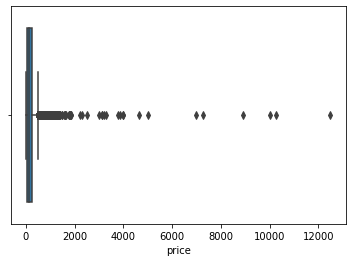

In [16]:
sns.boxplot(x="price", data=listings)

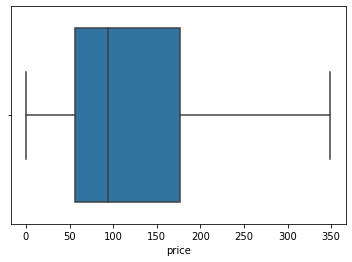

In [17]:
listings = listings[listings["price"]<350]
sns.boxplot(x="price", data=listings)

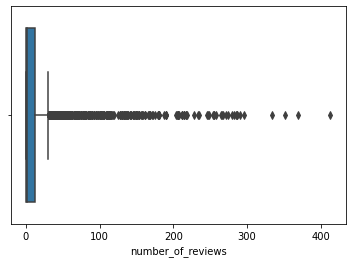

In [18]:
#Contains extreme outliers
sns.boxplot(x="number_of_reviews", data=listings)
listings = listings[listings["number_of_reviews"]<600]

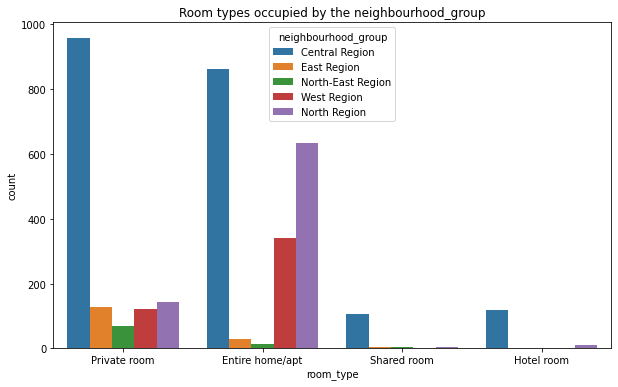

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = listings)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

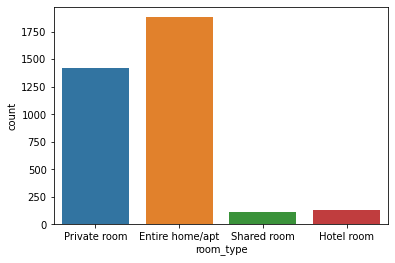

In [20]:
sns.countplot(x = 'room_type',data = listings)

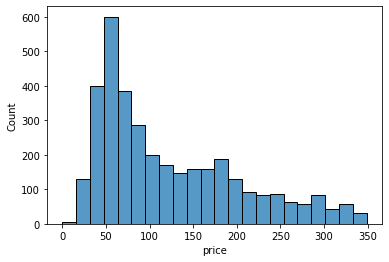

In [21]:
#Our dataset is not normally distributed, leptokurtic, positive skewness and long tail
sns.histplot(data=listings, x="price")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e41671310>,
      dtype=object)

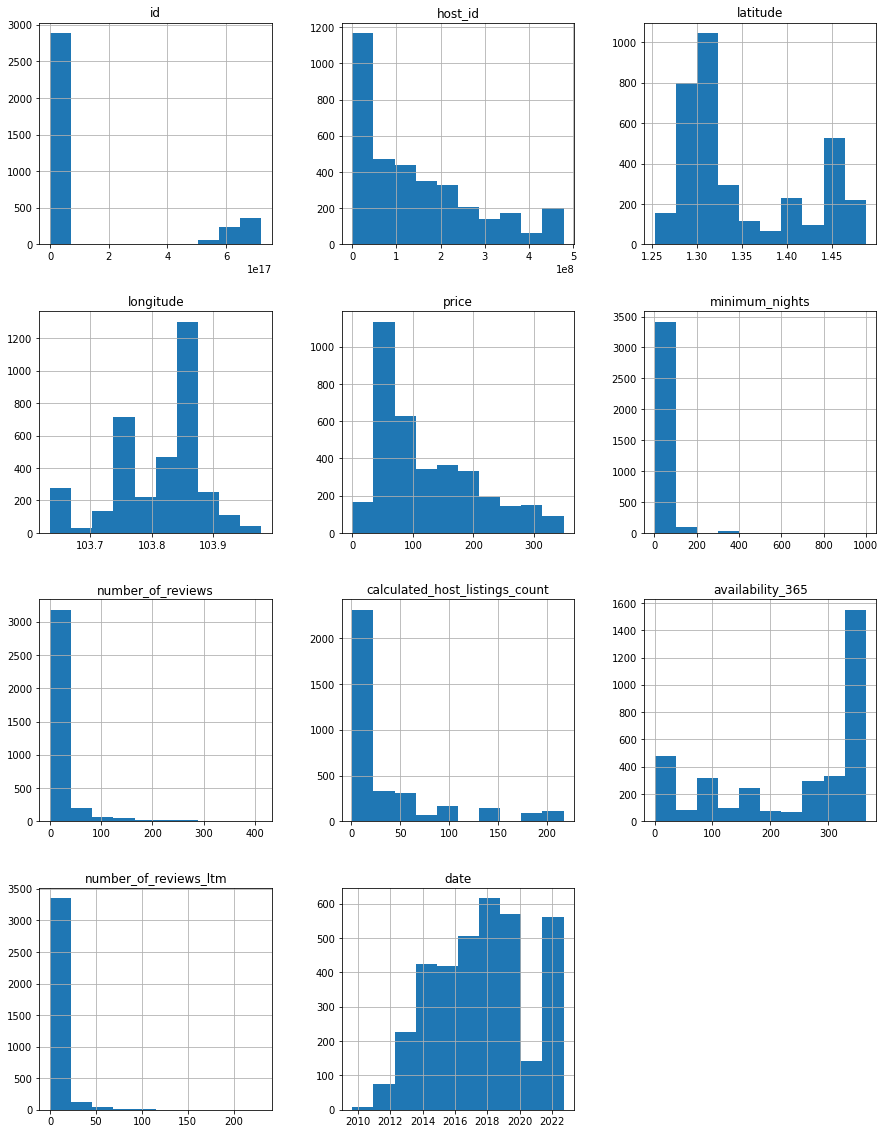

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
listings.hist(ax = ax)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


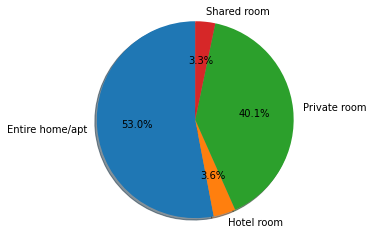

In [40]:
roomtype = np.array(listings["room_type"])
print(np.unique(roomtype))
#4 types: ['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']
nbroomtype=[np.count_nonzero(roomtype == "Entire home/apt"),np.count_nonzero(roomtype == "Hotel room"),
            np.count_nonzero(roomtype == "Private room"),np.count_nonzero(roomtype == "Shared room")]
fig1, ax1 = plt.subplots()
ax1.pie(nbroomtype, labels=roomtypename, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio
plt.show()

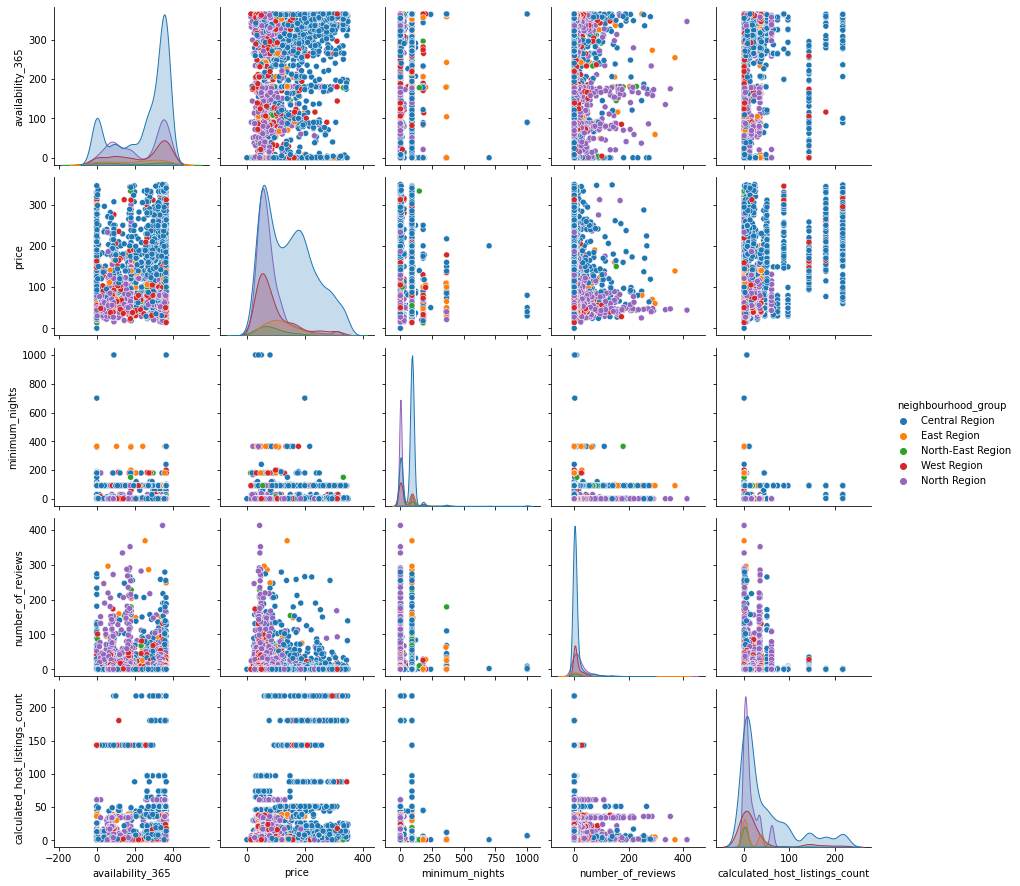

In [24]:
#We want to check for multicollinearity and multiple correlations
listings_matrix = listings[["neighbourhood_group","availability_365","price","minimum_nights","number_of_reviews","calculated_host_listings_count"]]
sns.pairplot(listings_matrix,hue="neighbourhood_group")
plt.show()

There is no linear correlation and no normal distribution among our discrete variables, however this chart demonstrates several insights. There seem to be three main large "owners" in the central region: one with around 130 listings,one around 175 listings and one with more than 200. The majority of our observations are located on the lower tier of our dataset.

In [74]:
listings[listings["calculated_host_listings_count"]>130].nunique()

id                                350
name                              231
host_id                             3
host_name                           3
neighbourhood_group                 3
neighbourhood                      21
latitude                          339
longitude                         335
room_type                           2
price                             139
minimum_nights                      5
number_of_reviews                  13
calculated_host_listings_count      3
availability_365                   72
number_of_reviews_ltm               4
date                              324
dtype: int64

In [25]:
print("reviews: ", reviews.info())
print("calendar: ", calendar.info())
print("listings: ", listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836294 entries, 0 to 836293
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     836294 non-null  int64         
 1   id             836294 non-null  int64         
 2   date           836294 non-null  datetime64[ns]
 3   reviewer_id    836294 non-null  int64         
 4   reviewer_name  836294 non-null  object        
 5   comments       836282 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 38.3+ MB
reviews:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518402 entries, 0 to 1518401
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1518402 non-null  int64         
 1   date            836294 non-null   datetime64[ns]
 2   available       1518402 non-null  object        
 3   pr

In [76]:
dfpricedate=listings.sort_values(by=['date']).head(100)

#Exploratory Data Analysis
1) Scatterplot with latitude and longitude, the hue will be availability or room type

2) Boxplot region/price

3) highest number of words in description correlation with number of reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


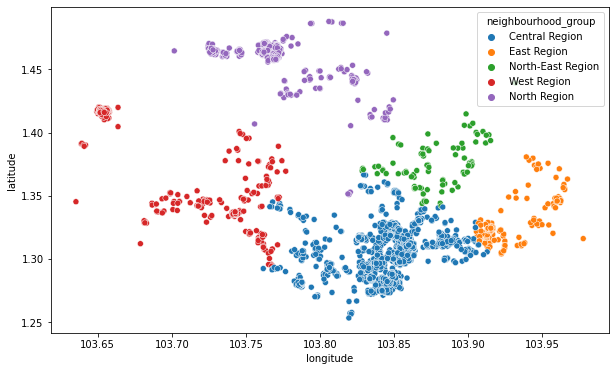

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings.longitude, listings.latitude, hue=listings.neighbourhood_group)

<Figure size 720x432 with 0 Axes>

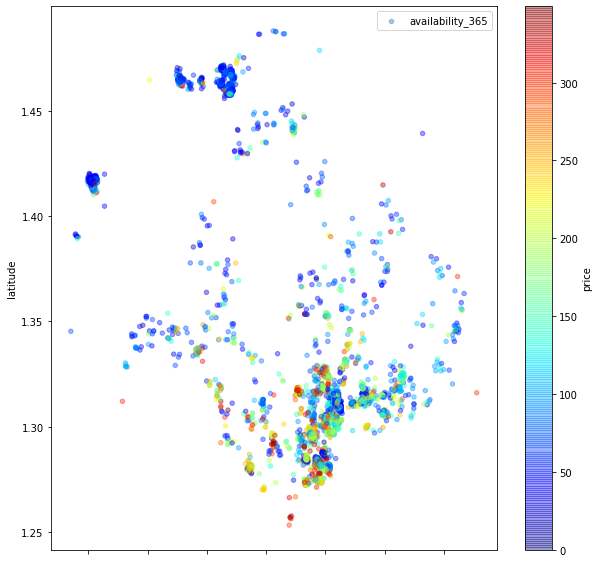

In [28]:
plt.figure(figsize=(10,6))
viz_availability=listings.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_availability.legend()
plt.ioff()

In [91]:
#number of rooms in central region available >250 days divided by total number of rooms in central region
#results = 67%, validate our hypothesis 3)
len(listings[(listings["availability_365"]>250) & listings["neighbourhood_group"] == "Central Region"])/len(listings["neighbourhood_group"] == "Central Region")

0.0

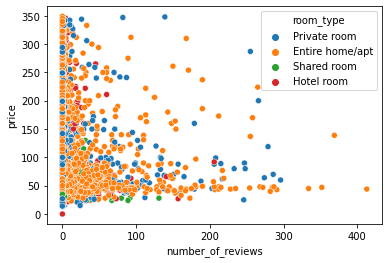

In [29]:
sns.scatterplot(x="number_of_reviews", y="price",hue='room_type' , data=listings)

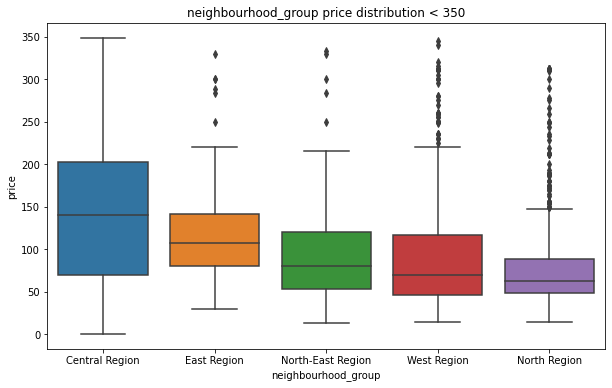

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = listings)
plt.title("neighbourhood_group price distribution < 350")
plt.show()

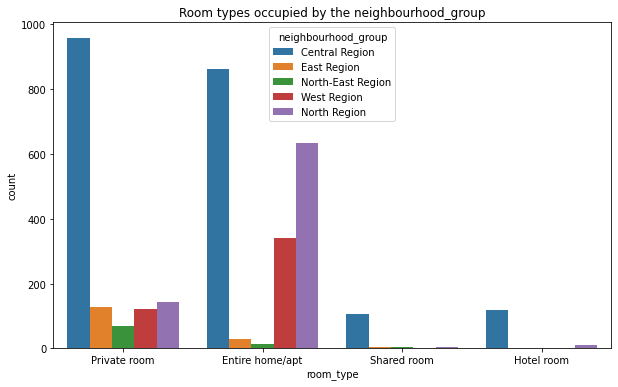

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = listings)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

In [32]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in listings.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)  
#we are going to use counter
from collections import Counter
#take the 25 used words by host to name their listing
_top_20_w=Counter(_names_for_count_).most_common()
_top_20_w=_top_20_w[0:20]

In [92]:
print(type(_top_20_w))
#change to df to use plot
sub_w=pd.DataFrame(_top_20_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

<class 'list'>


[Text(0, 0, 'room'),
 Text(0, 0, 'in'),
 Text(0, 0, 'mrt'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'near'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'apartment'),
 Text(0, 0, '@'),
 Text(0, 0, 'to'),
 Text(0, 0, '&'),
 Text(0, 0, 'with'),
 Text(0, 0, 'for'),
 Text(0, 0, 'city'),
 Text(0, 0, 'private'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'r&f'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'view')]

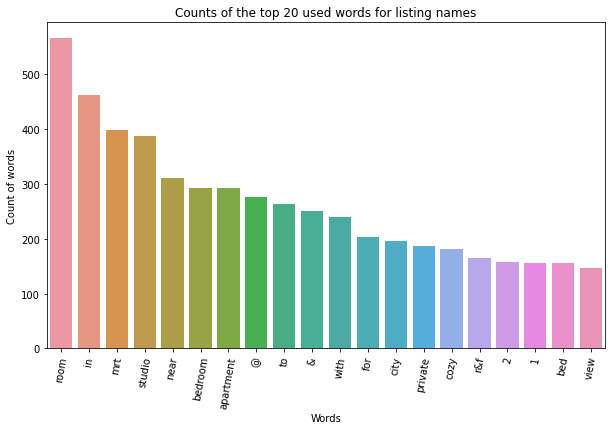

In [34]:
#we are going to use barplot for this visualization
plt.figure(figsize=(10,6))
wordcount=sns.barplot(x='Words', y='Count', data=sub_w)
wordcount.set_title('Counts of the top 20 used words for listing names')
wordcount.set_ylabel('Count of words')
wordcount.set_xlabel('Words')
wordcount.set_xticklabels(wordcount.get_xticklabels(), rotation=80)
#it worked, but ineffective for the results we wanted, this does not bring any value

In [35]:
#Sorting rooms according to maximum number of reviews
listings1=listings.sort_values(by=['number_of_reviews'],ascending=False)
listings1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,date
1058,25360027,【JB City SUASANA】byⒽⓈ Breeze Cozy Getaway (^_^)/,27081151,Enrica,North Region,Woodlands,1.46438,103.76086,Entire home/apt,44,1,413,1,346,96,2021-06-26
58,2129215,Luxuriously Spacious Studio Apt.,7642747,Shirley,East Region,Bedok,1.31936,103.91663,Entire home/apt,139,92,369,1,254,0,2014-08-16
1141,27292304,SS【Havona Suite】🏬〖Komtar JBCC🛍️🛒Johor Bahru〗❤️,136700088,Bryce [RentRadise],North Region,Woodlands,1.46361,103.76170,Entire home/apt,47,1,352,36,175,58,2017-09-16
1025,24834130,NEW! Stylish & Luxury Modern HomeStay with WIFI,90218343,Xavier,North Region,Woodlands,1.46207,103.76827,Entire home/apt,45,1,334,1,135,95,2020-09-07
139,5827998,The Lily Room,30080617,Eddie,East Region,Tampines,1.34460,103.96223,Private room,60,92,296,5,59,0,2015-08-29
1114,26672993,【TCH10】NETFLIX KingBed WiFi BigWorkspace Sanit...,191013727,Kym,North Region,Woodlands,1.46335,103.76151,Entire home/apt,43,1,291,2,173,62,2017-06-08
1146,27419905,【TCH9】FREE NETFLIX Parking King Bed WiFi Sanit...,206634285,Terence,North Region,Woodlands,1.46366,103.76053,Entire home/apt,48,1,287,1,158,75,2017-10-23
138,5827713,The Private Sanctuary,30080617,Eddie,East Region,Tampines,1.34640,103.96256,Private room,70,92,286,5,273,0,2015-08-10
919,23249199,SS【Kobe Suite】🏬〖Komtar JBCC🛍️🛒Johor Bahru〗❤️,136700088,Bryce [RentRadise],North Region,Woodlands,1.46339,103.76208,Entire home/apt,47,1,285,36,169,12,2015-10-08
1616,34051715,3 MIN CIQ❤️Cozy SuasanaSuite Johor Bahru [CS J...,46540264,Yee Won,North Region,Woodlands,1.46374,103.76106,Entire home/apt,40,1,282,1,233,101,2014-06-25


# Regression models

In [36]:
from scipy import stats
ycorr = listings["price"].astype('int')
xcorr = listings["number_of_reviews"].astype('int')
print(stats.pearsonr(xcorr, ycorr))
print(stats.spearmanr(xcorr,ycorr))
#there is no correlation at all between number of reviews and price, as we previously saw

(-0.1728137157823642, 3.462172300478955e-25)
SpearmanrResult(correlation=-0.305804858156044, pvalue=1.0950434731349712e-77)


In [78]:
# Let's try classification. Split data into train and validation part
y = listings["price"].astype('int')
x = listings[["availability_365","minimum_nights","number_of_reviews"]]
z = listings[["price","availability_365","minimum_nights","number_of_reviews"]]
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=0.3, random_state=17)

In [79]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [81]:
tree = DecisionTreeClassifier(max_depth=10, random_state=17)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=17)

In [82]:
#The treeclassifier provides a low accuracy, classification method does not work on our dataset
tree_predictions = tree.predict(X_valid)  
accuracy_score(y_valid, tree_predictions)

0.048826291079812206

In [ ]:
#we can already tell by looking at the scatterplot that there is no correlation and thus not possible to build a regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

In [ ]:
print(results.summary())

In [ ]:
sm.graphics.plot_partregress("price", "number_of_reviews",["availability_365","minimum_nights"], data=z, obs_labels=False)

We conclude that our hypothesis 1) is rejected.


#Regression based on date

In [ ]:
# add year and month
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month

In [ ]:
# num of reviews every year not really need
plt.figure(figsize=(8, 5), dpi=100)
n_reviews_year = reviews.groupby("year").size()
sns.barplot(n_reviews_year.index,n_reviews_year.values)
plt.show()

In [ ]:
# month not really need
plt.figure(figsize=(8, 5), dpi=100)
n_reviews_month = reviews.groupby("month").size()
sns.barplot(n_reviews_month.index,n_reviews_month.values)
plt.show()

In [ ]:
#group by a new metrix only with month, years and review
year_month_reviews = reviews.groupby(['year','month']).size().unstack("month").fillna(0)
year_month_reviews

In [ ]:
# line chart after Sep there is no data
fig,ax = plt.subplots(figsize=(10,5), dpi=100)
for index in year_month_reviews.index:
    series = year_month_reviews.loc[index]
    sns.lineplot(x=series.index,y=series.values,ax=ax)
ax.legend(labels=year_month_reviews.index)
ax.grid()
_ = ax.set_xticks(list(range(1,13)))

In [ ]:
#Reviews predict
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ##for price predict but failed##
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
ym_reviews = reviews.groupby(['year','month']).size().reset_index().rename(columns={0:"count"})  # .rename(columns={0:"count"})重命名指定列

# get fearures and targets
features = ym_reviews[['year','month']]
targets = ym_reviews['count']

X_train,X_test,y_train,y_test = train_test_split(features,targets,test_size=0.25)
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)

y_predict = regressor.predict(X_test)

print("average error：",mean_absolute_error(y_test,y_predict))
print("R2：",r2_score(y_test,y_predict))

In [ ]:
#the result
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(features,targets)

y_predict = regressor.predict([
    [2022,10],
    [2022,11],
    [2022,12]
])

y_predict

In [ ]:
#draw the line chart
predict_reviews = pd.DataFrame([[2022,10+index,x] for index,x in enumerate(y_predict)],columns=['year','month','count'])
final_reviews = pd.concat([ym_reviews,predict_reviews]).reset_index()
years = final_reviews['year'].unique()

fig,ax = plt.subplots(figsize=(10,5), dpi=100)
# by years
for year in years:
    df = final_reviews[final_reviews['year']==year]
    sns.lineplot(x="month",y='count',data=df)

ax.legend(labels=year_month_reviews.index)
ax.grid()
_ = ax.set_xticks(list(range(1,13)))